# Online Retail Customer Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Data=pd.read_csv('C:/Users/user/Desktop/intellipaat/Datasets/OnlineRetail.csv',encoding='iso-8859-1')

In [1]:
# Data Set Information:

# This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 
#for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 
#Many customers of the company are wholesalers.


# Attribute Information:

# InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
# StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
# Description: Product (item) name. Nominal.
# Quantity: The quantities of each product (item) per transaction. Numeric.
# InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
# UnitPrice: Unit price. Numeric, Product price per unit in sterling.
# CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
# Country: Country name. Nominal, the name of the country where each customer resides.

::::::::::::::::Data Wrangling(Cleaning)::::::::::::::::

In [30]:
Data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [31]:
Data['Total']=Data.Quantity*Data.UnitPrice

In [32]:
Data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [46]:
#Finding %age of Null Values in each column
(Data.isna().sum()/len(Data.CustomerID))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Total           0.000000
dtype: float64

In [53]:
#Wihout customerID, the record doesn't make much sence since it is the primary key of the dataset
Data.dropna(axis=0,how='any',inplace=True)

In [54]:
(Data.isna().sum()/len(Data.CustomerID))*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
Total          0.0
dtype: float64

In [33]:
#Finding Outliers/Abnormalities (We don't want occasional quantity/Total to be there)
Data.describe()

,Quantity,UnitPrice,CustomerID,Total
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


<AxesSubplot:>

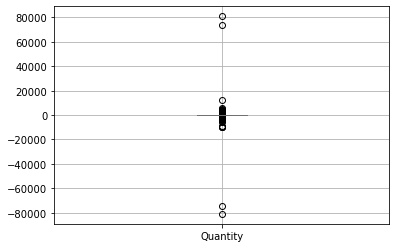

In [38]:
Data.boxplot(column='Quantity')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

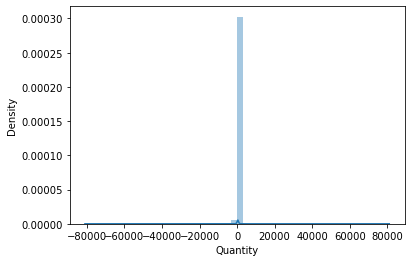

In [40]:
sns.distplot(Data['Quantity'])

<AxesSubplot:>

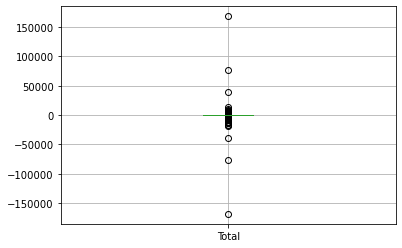

In [36]:
Data.boxplot(column='Total')

In [56]:
#Finding the IQR for Quantity column
Q1 = Data['Quantity'].quantile(0.25)
Q3 = Data['Quantity'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

10.0


In [57]:
Data = Data[(Data['Quantity'] >= Q1 - 1.5*IQR) & (Data['Quantity'] <= Q3 + 1.5*IQR)]

In [58]:
#Finding the IQR for Total column
Q1 = Data['Total'].quantile(0.25)
Q3 = Data['Total'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

13.45


In [59]:
Data = Data[(Data['Total'] >= Q1 - 1.5*IQR) & (Data['Total'] <= Q3 + 1.5*IQR)]

<AxesSubplot:>

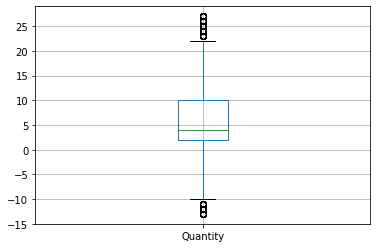

In [60]:
Data.boxplot(column='Quantity')

<AxesSubplot:>

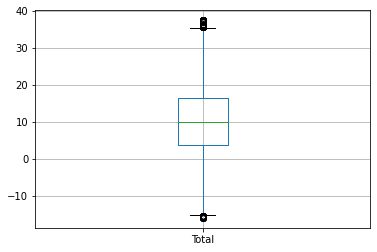

In [61]:
Data.boxplot(column='Total')

::::::::::::::Data Engineering (Exploratory Data Analysis)::::::::

In [75]:
#1)Best selling, Worst selling product(groupby with desc,quantity with max/min): helps in managing inventory
Temp1=Data.groupby(['Description'])['Description','Quantity'].sum().reset_index()

C:\Users\user\AppData\Local\Temp/ipykernel_9712/1304713053.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Temp1=Data.groupby(['Description'])['Description','Quantity'].sum().reset_index()


In [76]:
Product_Sales=Temp1.sort_values(by='Quantity',ascending=False).reset_index()

In [77]:
Product_Sales.head(1)

,index,Description,Quantity
0,2250,PACK OF 72 RETROSPOT CAKE CASES,14994


In [81]:
Product_Sales.columns

Index(['index', 'Description', 'Quantity'], dtype='object')

In [83]:
Product_Sales=Product_Sales.iloc[:,1:]

In [85]:
#top five products by sales
Product_Sales.head(5)

,Description,Quantity
0,PACK OF 72 RETROSPOT CAKE CASES,14994
1,ASSORTED COLOUR BIRD ORNAMENT,10275
2,LUNCH BAG RED RETROSPOT,9604
3,WHITE HANGING HEART T-LIGHT HOLDER,9019
4,JAM MAKING SET PRINTED,8594


In [133]:
#Bottom 5 product in terms of Sales: Can be discontinued
Product_Sales.tail(2)

,Description,Quantity
3841,PINK POODLE HANGING DECORATION,-12
3842,Discount,-25


Negative quantity indicates return items

In [134]:
#Beter to find items that didn' sell
Product_Sales.loc[(Product_Sales.Quantity==0)]

,Description,Quantity
3815,DIAMANTE HAIR GRIP PACK/2 PERIDOT,0
3816,DIAMANTE HAIR GRIP PACK/2 CRYSTAL,0
3817,PINK DAISY BAG CHARM,0
3818,WHITE BEADED GARLAND STRING 20LIGHT,0
3819,DAISY HAIR COMB,0
3820,SET 10 CARDS HANGING BAUBLES 17080,0


In [86]:
#  2)High End/Low End Customer based on mean buying value: helps in targeting customers with diff marketing strategies

In [106]:
Temp3=Data.groupby(['CustomerID']).sum().reset_index().sort_values(by='Total',ascending=False).reset_index()

In [107]:
Temp3.drop({'index','Quantity','UnitPrice'},axis=1,inplace=True)

In [110]:
# Top 5(or x) buyers: can offer such customers COUPONS for being valued customers
Temp3.head(5)

,CustomerID,Total
0,14911.0,80142.44
1,14096.0,40907.39
2,17841.0,34699.23
3,13089.0,25990.56
4,12748.0,22401.61


In [62]:
# 4)High End Customer shopping list mean value grouped by items: To offer discounts
# Find the top contributing customers and search their list
Temp=Data.groupby(['CustomerID','Description']).mean().reset_index()

In [63]:
Temp

,CustomerID,Description,Quantity,UnitPrice,Total
0,12347.0,3D DOG PICTURE PLAYING CARDS,12.0,2.95,35.40
1,12347.0,3D SHEET OF CAT STICKERS,12.0,0.85,10.20
2,12347.0,3D SHEET OF DOG STICKERS,12.0,0.85,10.20
3,12347.0,60 TEATIME FAIRY CAKE CASES,24.0,0.55,13.20
4,12347.0,72 SWEETHEART FAIRY CAKE CASES,24.0,0.55,13.20
...,...,...,...,...,...
248259,18287.0,SMALL YELLOW BABUSHKA NOTEBOOK,12.0,0.85,10.20
248260,18287.0,STAR T-LIGHT HOLDER WILLIE WINKIE,12.0,1.65,19.80
248261,18287.0,STRAWBERRY CERAMIC TRINKET BOX,12.0,1.25,15.00
248262,18287.0,SWISS CHALET TREE DECORATION,24.0,0.29,6.96


In [124]:
Temp.loc[(Temp.CustomerID==14911)].sort_values(by='Quantity',ascending=False)

,CustomerID,Description,Quantity,UnitPrice,Total
109715,14911.0,WRAP BAD HAIR DAY,25.0,0.10,2.50
109725,14911.0,WRAP RED APPLES,25.0,0.42,10.50
109723,14911.0,WRAP PAISLEY PARK,25.0,0.42,10.50
109721,14911.0,WRAP GINGHAM ROSE,25.0,0.42,10.50
109720,14911.0,WRAP ENGLISH ROSE,25.0,0.42,10.50
...,...,...,...,...,...
109620,14911.0,VINTAGE GOLD TINSEL REEL,-6.0,0.42,-2.52
109072,14911.0,PENS ASSORTED FUNKY JEWELED,-7.0,0.19,-1.33
108421,14911.0,DAIRY MAID STRIPE MUG,-8.0,0.79,-6.32
109119,14911.0,PINK POODLE HANGING DECORATION,-12.0,0.38,-4.56


In [130]:
# 5)Number of Unique Customers for the current month: Tracks online footfalls, can be used to compare with offline footfalls
len(Data.CustomerID.unique())

4210

End Of Analysis

In [3]:
import datetime as dt
from sklearn.cluster import KMeans

In [4]:
retail=pd.read_csv('C:/Users/user/Desktop/intellipaat/Datasets/OnlineRetail.csv',encoding='iso-8859-1')

In [5]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']


In [6]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m.head()
#amount spent

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [7]:
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [8]:
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [9]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()

In [10]:
rfm_f = rfm_f.reset_index()
rfm_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
rfm_f

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [12]:
rfm_f=rfm_f.reset_index()

In [13]:
rfm_f.columns = ['index','CustomerID', 'Frequency']
rfm_f.head()

,index,CustomerID,Frequency
0,0,12346.0,2
1,1,12347.0,182
2,2,12348.0,31
3,3,12349.0,73
4,4,12350.0,17


In [14]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,index,Frequency
0,12346.0,0.00,0,2
1,12347.0,4310.00,1,182
2,12348.0,1797.24,2,31
3,12349.0,1757.55,3,73
4,12350.0,334.40,4,17


In [15]:
rfm.shape

(4372, 4)

In [16]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Amount         float64
dtype: object

In [17]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%m/%d/%Y %H:%M')


In [18]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Amount                float64
dtype: object

In [19]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [20]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [21]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [22]:
rfm_p.shape
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [23]:
rfm_p

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [24]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [25]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')


In [26]:
rfm

,CustomerID,Amount,index,Frequency,Diff
0,12346.0,0.00,0,2,325
1,12347.0,4310.00,1,182,1
2,12348.0,1797.24,2,31,74
3,12349.0,1757.55,3,73,18
4,12350.0,334.40,4,17,309
...,...,...,...,...,...
4367,18280.0,180.60,4367,10,277
4368,18281.0,80.82,4368,7,180
4369,18282.0,176.60,4369,13,7
4370,18283.0,2094.88,4370,756,3


In [34]:
rfm.drop(columns=['index'],axis=0, inplace=True)
rfm.head()

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [37]:
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

In [38]:
rfm.describe()

,CustomerID,Amount,Frequency,Recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,91.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13812.750000,293.362500,17.000000,16.000000
50%,15300.500000,648.075000,42.000000,49.000000
75%,16778.250000,1611.725000,102.000000,142.000000
max,18287.000000,279489.020000,7983.000000,373.000000


Text(0.5, 0, 'Attributes')

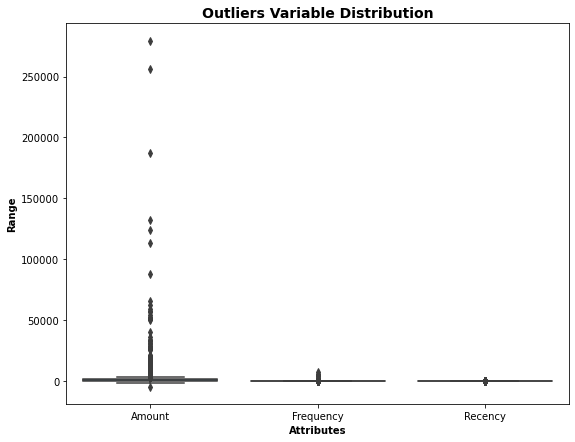

In [39]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
#plt.rcParams['figure.figsize'] = [14,8]
plt.figure(figsize=(9,7))

sns.boxplot(data = rfm[attributes])

plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [40]:
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1

In [41]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [42]:
rfm.describe()

,CustomerID,Amount,Frequency,Recency
count,3629.000000,3629.000000,3629.000000,3629.000000
mean,15299.860843,787.019433,47.736567,97.162855
std,1716.562554,745.191104,42.505471,96.901974
min,12346.000000,-1592.490000,1.000000,0.000000
25%,13816.000000,257.230000,15.000000,21.000000
50%,15292.000000,530.150000,33.000000,58.000000
75%,16777.000000,1065.350000,69.000000,156.000000
max,18287.000000,3563.850000,181.000000,362.000000


In [44]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [45]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)#mean= 0 and sd=1
rfm_df_scaled

array([[-1.05627655, -1.07616428,  2.35153665],
       [ 1.35583983, -0.39380514, -0.23906682],
       [ 1.30257099,  0.59443913, -0.81705007],
       ...,
       [-0.94780621, -0.95851616,  0.85497289],
       [-0.81925771, -0.8173384 , -0.93058249],
       [ 1.40957842,  0.52385025, -0.56934296]])

In [46]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591


In [47]:
Building the model

SyntaxError: invalid syntax (Temp/ipykernel_5524/3588133108.py, line 1)

In [48]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [49]:
kmeans.labels_

array([3, 2, 2, ..., 3, 1, 2])

In [50]:
a=kmeans.labels_
a=pd.DataFrame(a)
a.value_counts()

1    1520
3     904
2     823
0     382
dtype: int64

In [51]:
Finding the Optimal Number of Clusters

SyntaxError: invalid syntax (Temp/ipykernel_5524/4119858263.py, line 1)

In [52]:
# Elbow-curve/SSD
# inertia
# Sum of squared distances of samples to their closest cluster center.

ssd = [] #store the ssd data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]# number of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
ssd

[6112.921835859569,
 3708.1163172908427,
 2922.974984856262,
 2486.091966225206,
 2186.061882742727,
 1940.334580780778,
 1761.8183532493574]

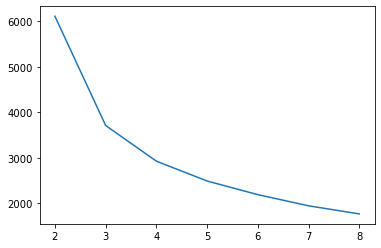

In [53]:
# plot the SSDs for each n_clusters
x=[2,3,4,5,6,7,8]
y=ssd
plt.plot(x,y)

In [54]:
# Final model with k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=5)

In [55]:
 kmeans.labels_

array([2, 3, 3, ..., 2, 1, 3])

In [56]:
b=kmeans.labels_
b=pd.DataFrame(b)
b.value_counts()

1    1376
2     890
3     672
4     346
0     345
dtype: int64

In [57]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,3
3,12349.0,1757.55,73,18,3
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,3


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

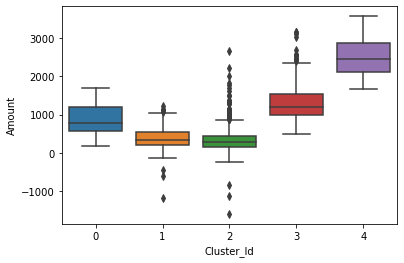

In [58]:
# Box plot to visualize Cluster Id vs m

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

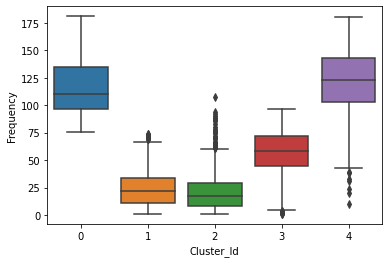

In [59]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

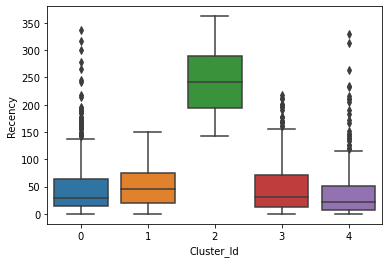

In [60]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [61]:
rfm[rfm['Cluster_Id']==2]
# the data specified to each cluster

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
4,12350.0,334.40,17,309,2
6,12353.0,89.00,4,203,2
7,12354.0,1079.40,58,231,2
8,12355.0,459.40,13,213,2
...,...,...,...,...,...
4346,18250.0,342.92,22,300,2
4350,18256.0,-50.10,4,354,2
4359,18269.0,138.90,8,357,2
4367,18280.0,180.60,10,277,2
